Sentence_segmentation

In [ ]:
# perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# from spacy basics
doc = nlp(u'This is the first sentence. This is another sentence. This is the last sentence')

for sent in doc.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence


In [ ]:
print(doc[0])

This


In [ ]:
print(doc.sents[1])

TypeError: '_cython_3_1_1.generator' object is not subscriptable

In [ ]:
doc_sents = [sent for sent in doc.sents]
doc_sents

[This is the first sentence.,
 This is another sentence.,
 This is the last sentence]

NOte- list(doc.sents) also works

In [ ]:
print(doc_sents[1])

This is another sentence.


In [ ]:
type(doc_sents[1])

spacy.tokens.span.Span

In [ ]:
print(doc_sents[1].start, doc_sents[1].end)

6 11


Adding Rules

In [ ]:
# parsing the segmentation start tokens happens during the nlp pipeline
doc2 = nlp(u'This is a sentence. This is a sentence. This is a sentence.')

for token in doc2:
    print(token.is_sent_start, ' '+token.text)

True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .


let's add semicolon

In [ ]:
# SPACY 's default behaviour
doc3 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


In [ ]:
# Adda new rule to the pipeline
from spacy.language import Language
@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

nlp.add_pipe("set_custom_boundaries",before='parser')
nlp.pipe_names

['tok2vec',
 'tagger',
 'set_custom_boundaries',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
doc4 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc4.sents:
    print(sent)

"Management is doing things right;
leadership is doing the right things."
-Peter Drucker


In [ ]:
#doc4 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

# new rule doesn't apply to previous document
for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4904 non-null   object
 1   message  4904 non-null   object
 2   length   4904 non-null   int64 
 3   punct    4904 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 191.6+ KB


In [ ]:
df['length'].fillna(df['length'].mean(), inplace=True)

/tmp/ipython-input-2600766639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['length'].fillna(df['length'].mean(), inplace=True)


In [ ]:
df['punct'].fillna(df['punct'].mean(), inplace=True)

/tmp/ipython-input-738800370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['punct'].fillna(df['punct'].mean(), inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
q1=df['length'].quantile(0.25)
q3=df['length'].quantile(0.75)
iqr=q3-q1
df = df[((df['length']>=q1 -1.5*iqr) & (df['length']<=q3 + 1.5*iqr))]

In [ ]:
q1=df['punct'].quantile(0.25)
q3=df['punct'].quantile(0.75)
iqr=q3-q1
df = df[((df['punct']>=q1 -1.5*iqr) & (df['punct']<=q3 + 1.5*iqr))]

In [ ]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4904 non-null   object
 1   message  4904 non-null   object
 2   length   4904 non-null   int64 
 3   punct    4904 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 191.6+ KB


In [ ]:
# Count total messages in each category
label_counts = df['label'].value_counts()

print("📊 Count of each label:")
print(label_counts, "\n")

# Percentage of each label
label_percent = df['label'].value_counts(normalize=True) * 100

print("📈 Percentage of each label:")
print(label_percent)

📊 Count of each label:
label
ham     4289
spam     615
Name: count, dtype: int64 

📈 Percentage of each label:
label
ham     87.459217
spam    12.540783
Name: proportion, dtype: float64


In [ ]:

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import string


/tmp/ipython-input-695533948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


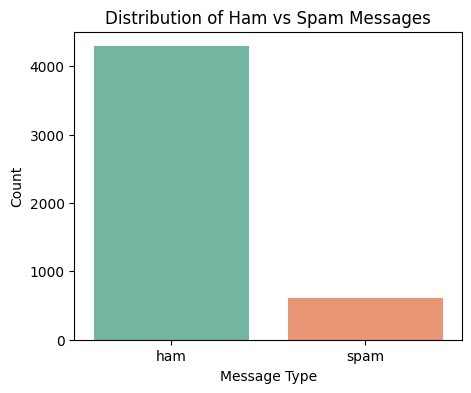

In [ ]:
# ⿡ Distribution of Labels
# ---------------------------------------
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribution of Ham vs Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# Percentage of spam messages
spam_percent = df['label'].value_counts(normalize=True) * 100
print("🔹 Percentage of each class:\n", spam_percent, "\n")



🔹 Percentage of each class:
 label
ham     87.459217
spam    12.540783
Name: proportion, dtype: float64 



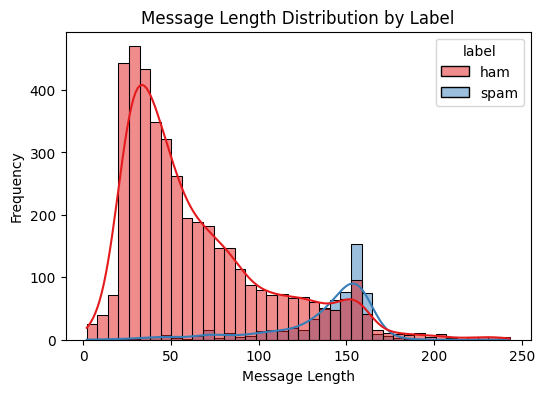

🔹 Average message length:
label
ham      64.282350
spam    136.773984
Name: length, dtype: float64 



In [ ]:
# ⿢ Message Length Analysis
# ---------------------------------------
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='length', bins=40, hue='label', kde=True, palette='Set1')
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

print("🔹 Average message length:")
print(df.groupby('label')['length'].mean(), "\n")


/tmp/ipython-input-350716017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='punct', palette='coolwarm')


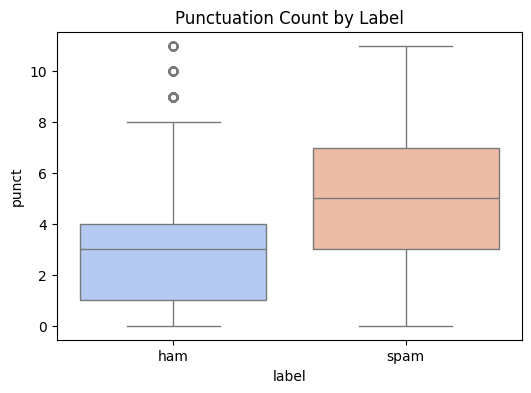

🔹 Average punctuation usage:
label
ham     3.145722
spam    5.120325
Name: punct, dtype: float64 



In [ ]:
# ⿣ Punctuation Count Analysis
# ---------------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y='punct', palette='coolwarm')
plt.title('Punctuation Count by Label')
plt.show()

print("🔹 Average punctuation usage:")
print(df.groupby('label')['punct'].mean(), "\n")


/tmp/ipython-input-3343450964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['message'].apply(lambda x: len(x.split()))
/tmp/ipython-input-3343450964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['message'].apply(len)
/tmp/ipython-input-3343450964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

🔹 Average word count per message type:
label
ham     13.014922
spam    23.705691
Name: word_count, dtype: float64 



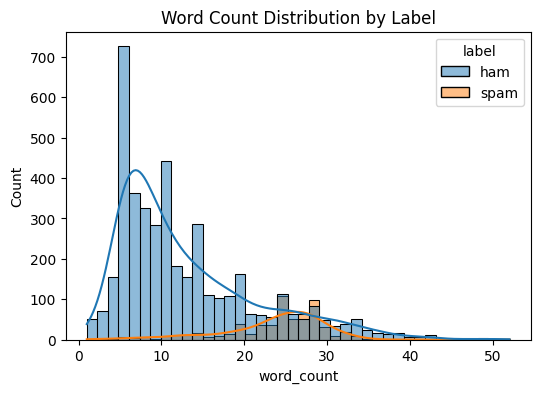

In [ ]:
# ⿤ Word and Character Insights
# ---------------------------------------
# Add word count feature
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['char_count'] = df['message'].apply(len)
df['punct_count'] = df['message'].apply(lambda x: sum([1 for ch in x if ch in string.punctuation]))

# Compare word and character stats
print("🔹 Average word count per message type:")
print(df.groupby('label')['word_count'].mean(), "\n")

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='word_count', hue='label', kde=True, bins=40)
plt.title('Word Count Distribution by Label')
plt.show()


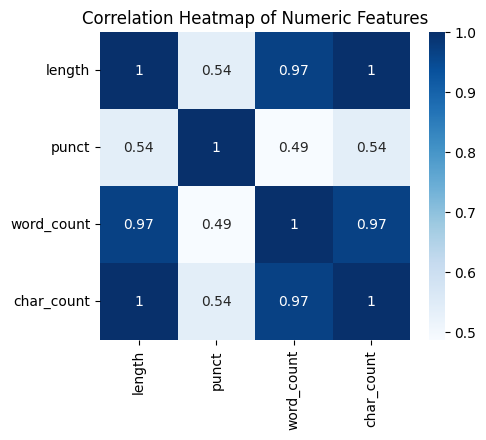

In [ ]:
# ⿥ Correlation Heatmap (numeric features)
# ---------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(df[['length','punct','word_count','char_count']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
